# 02b Prep the geographical data 

> Look at where the catchment areas of GP practices overlap with the boundaries of local authority districts. 

---

In [1]:
#|default_exp core.02b_prep_geo_data

In [2]:
#|hide
import nbdev; nbdev.nbdev_export()

In [3]:
#|hide
from nbdev.showdoc import show_doc

In [4]:
#|export
import dementia_inequalities as proj
from dementia_inequalities import const, log, utils, tools
import adu_proj.utils as adutils

In [5]:
#|export
import numpy as np 
import pandas as pd 
import geopandas as gpd

---

In [6]:
# Load data 
data1 = gpd.read_file(const.data_path+'/Catchment Area/A81001.geojson')
data2 = gpd.read_file(const.data_path+'/Catchment Area/A81002.geojson')

res_data = pd.concat([data1, data2])

In [7]:
len(res_data)

2

In [8]:
res_data.reset_index()

,index,stroke-opacity,name,Region,SubICBCode,ICBCode,ODSCode,fill-opacity,stroke,OrgLongitude,OrgLatitude,geometry,DCORegion,CCGCode
0,0,1,A81001 - THE DENSHAM SURGERY,Y63,16C,QHM,A81001,0,#FF901E,-1.3189990,54.5616378,"POLYGON ((-1.32325 54.55325, -1.31906 54.55418...",NaN,NaN
1,0,1,A81002 - QUEENS PARK MEDICAL CENTRE,Y54,NaN,NaN,A81002,0,#0000FF,-1.313942,54.569032,"POLYGON ((-1.35853 54.59156, -1.37466 54.57122...",Q74,00K


In [9]:
import os,glob

gp_data = gpd.read_file(const.data_path+'/Catchment Area/A81001.geojson')
for filename in glob.glob(os.path.join(const.data_path+'/Catchment Area/', '*.geojson')):
  gp_data = pd.concat([gp_data, gpd.read_file(filename)])

In [10]:
gp_data

,stroke-opacity,name,Region,SubICBCode,ICBCode,ODSCode,fill-opacity,stroke,OrgLongitude,OrgLatitude,geometry,DCORegion,CCGCode
0,1.0,A81001 - THE DENSHAM SURGERY,Y63,16C,QHM,A81001,0.0,#FF901E,-1.3189990,54.5616378,"POLYGON ((-1.32325 54.55325, -1.31906 54.55418...",NaN,NaN
0,1.0,G82697 - THE CHURCHILL CLINIC,Y59,NaN,NaN,G82697,0.0,#0000FF,0.533642,51.360124,"POLYGON ((0.52430 51.34086, 0.51492 51.34106, ...",Q88,09W
0,1.0,C81001 -,Y55,NaN,NaN,C81001,0.0,#0000FF,-1.265589,53.277848,"POLYGON ((-1.29433 53.29313, -1.31081 53.24200...",Q76,04J
0,1.0,H81060 - TOWNHILL MEDICAL PRACTICE,Y59,92A,QXU,H81060,0.0,#FF901E,-0.1026172,51.2904453,"POLYGON ((-0.08798 51.31101, -0.08901 51.31055...",NaN,NaN
0,1.0,Y01127 - NEETSIDE SURGERY,Y58,11N,QT6,Y01127,0.0,#FF901E,-4.5451945,50.8281068,"POLYGON ((-4.57795 50.73053, -4.58611 50.73836...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,1.0,A86013 - DENTON PARK MEDICAL GROUP,Y54,NaN,NaN,A86013,0.0,#0000FF,-1.698583,54.99315,"POLYGON ((-1.68400 54.98254, -1.67404 54.97988...",Q74,13T
4,1.0,A86013 - DENTON PARK MEDICAL GROUP,Y54,NaN,NaN,A86013,0.0,#0000FF,-1.698583,54.99315,"POLYGON ((-1.65670 54.99002, -1.65653 54.99180...",Q74,13T
0,1.0,A83635 - BOWBURN MEDICAL CENTRE,Y54,NaN,NaN,A83635,0.0,#0000FF,-1.527322,54.736261,"POLYGON ((-1.51405 54.73949, -1.52985 54.76544...",Q74,00J
1,1.0,A83635 - BOWBURN MEDICAL CENTRE,Y54,NaN,NaN,A83635,0.0,#0000FF,-1.527322,54.736261,"POLYGON ((-1.52161 54.72740, -1.55216 54.76267...",Q74,00J


In [22]:
LAD_data = gpd.read_file(const.data_path+'/LAD_area/LAD_Dec_2021_GB_BFC_2022_-8975151699474964544.geojson')
LAD_data.to_crs(epsg=4326, inplace=True)

In [23]:
LAD_data

,OBJECTID,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,1,E06000001,Hartlepool,,447160,531474,-1.27018,54.67614,cb7275ce-d16e-45f7-8e7d-33032fb9df9d,"MULTIPOLYGON (((-1.22470 54.62611, -1.22493 54..."
1,2,E06000002,Middlesbrough,,451141,516887,-1.21099,54.54467,6598062e-357c-4e8d-b117-5d6de45f75b7,"MULTIPOLYGON (((-1.27720 54.54784, -1.27721 54..."
2,3,E06000003,Redcar and Cleveland,,464361,519597,-1.00608,54.56752,b23f8b9b-4d88-4c21-80d6-8041e2910ef2,"MULTIPOLYGON (((-1.20098 54.57763, -1.20030 54..."
3,4,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.55691,64624aef-6611-4e3c-bba8-870b0b889e1d,"MULTIPOLYGON (((-1.27211 54.55337, -1.27213 54..."
4,5,E06000005,Darlington,,428029,515648,-1.56835,54.53534,310b13b3-f45f-452b-88f1-ddd48c1992f5,"POLYGON ((-1.63768 54.61714, -1.63767 54.61670..."
...,...,...,...,...,...,...,...,...,...,...
358,359,W06000020,Torfaen,Torfaen,327459,200480,-3.05101,51.69836,5236d7c9-0915-4b85-892f-e20c75a88af6,"POLYGON ((-3.10490 51.79504, -3.10171 51.79372..."
359,360,W06000021,Monmouthshire,Sir Fynwy,337812,209231,-2.90280,51.77827,de1a5dcb-a91e-40bf-b3b3-3e13eed9203f,"MULTIPOLYGON (((-2.78124 51.52530, -2.78143 51..."
360,361,W06000022,Newport,Casnewydd,337897,187432,-2.89769,51.58231,a1ae351c-86e5-4cd8-9a76-88563a52c817,"MULTIPOLYGON (((-2.95223 51.62897, -2.95200 51..."
361,362,W06000023,Powys,Powys,302329,273255,-3.43531,52.34864,5cb7e231-ad03-40d5-9f64-1e0fbeb6db4b,"MULTIPOLYGON (((-3.91191 52.56285, -3.90952 52..."


In [24]:
data1 = gpd.read_file(const.data_path+'/Catchment Area/A81001.geojson')
data1

,stroke-opacity,name,Region,SubICBCode,ICBCode,ODSCode,fill-opacity,stroke,OrgLongitude,OrgLatitude,geometry
0,1,A81001 - THE DENSHAM SURGERY,Y63,16C,QHM,A81001,0,#FF901E,-1.3189990,54.5616378,"POLYGON ((-1.32325 54.55325, -1.31906 54.55418..."


In [25]:
data1.to_crs(epsg=4326, inplace=True)

In [26]:
df_GP1_LAD = gpd.sjoin(LAD_data, data1, how='inner', predicate='intersects')
df_GP1_LAD

,OBJECTID,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,...,stroke-opacity,name,Region,SubICBCode,ICBCode,ODSCode,fill-opacity,stroke,OrgLongitude,OrgLatitude
3,4,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.55691,64624aef-6611-4e3c-bba8-870b0b889e1d,"MULTIPOLYGON (((-1.27211 54.55337, -1.27213 54...",...,1,A81001 - THE DENSHAM SURGERY,Y63,16C,QHM,A81001,0,#FF901E,-1.3189990,54.5616378


In [27]:
df_GP1_LAD.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
data2 = gpd.read_file(const.data_path+'/Catchment Area/A81002.geojson')
data2.to_crs(epsg=4326, inplace=True)

In [29]:
df_GP2_LAD = gpd.sjoin(LAD_data, data2, how='inner', predicate='intersects')
df_GP2_LAD

,OBJECTID,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,...,DCORegion,stroke-opacity,OrgLongitude,OrgLatitude,name,Region,CCGCode,ODSCode,fill-opacity,stroke
3,4,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.55691,64624aef-6611-4e3c-bba8-870b0b889e1d,"MULTIPOLYGON (((-1.27211 54.55337, -1.27213 54...",...,Q74,1,-1.313942,54.569032,A81002 - QUEENS PARK MEDICAL CENTRE,Y54,00K,A81002,0,#0000FF


In [30]:
data3 = gpd.read_file(const.data_path+'/Catchment Area/A82014.geojson')
data3.to_crs(epsg=4326, inplace=True)

list(gpd.sjoin(LAD_data, data3, how='inner', predicate='intersects').area)

/var/folders/4n/x6w1yfcx01qbymrsfpz4ybq00000gn/T/ipykernel_10754/1860411146.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  list(gpd.sjoin(LAD_data, data3, how='inner', predicate='intersects').area)


[0.1754480623986736, 0.14573787318574502, 0.3000498665444153]

In [31]:
data3

,DCORegion,stroke-opacity,OrgLongitude,OrgLatitude,name,Region,CCGCode,ODSCode,fill-opacity,stroke,geometry
0,Q74,1,-3.050673,54.749879,A82014 - CALDBECK SURGERY,Y54,01H,A82014,0,#0000FF,"POLYGON ((-3.16269 54.80187, -3.18604 54.78723..."


In [32]:
float(LAD_data[LAD_data['LAD21NM']=='Eden'].overlay(data3, how='intersection').area) / float(LAD_data[LAD_data['LAD21NM']=='Eden'].area)

/var/folders/4n/x6w1yfcx01qbymrsfpz4ybq00000gn/T/ipykernel_10754/3553153242.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  float(LAD_data[LAD_data['LAD21NM']=='Eden'].overlay(data3, how='intersection').area) / float(LAD_data[LAD_data['LAD21NM']=='Eden'].area)
/var/folders/4n/x6w1yfcx01qbymrsfpz4ybq00000gn/T/ipykernel_10754/3553153242.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(LAD_data[LAD_data['LAD21NM']=='Eden'].overlay(data3, how='intersection').area) / float(LAD_data[LAD_data['LAD21NM']=='Eden'].area)
/var/folders/4n/x6w1yfcx01qbymrsfpz4ybq00000gn/T/ipykernel_10754/3553153242.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected

0.02558188374672143

In [33]:
float(LAD_data[LAD_data['LAD21NM']=='Eden'].area)

/var/folders/4n/x6w1yfcx01qbymrsfpz4ybq00000gn/T/ipykernel_10754/2637524054.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  float(LAD_data[LAD_data['LAD21NM']=='Eden'].area)
/var/folders/4n/x6w1yfcx01qbymrsfpz4ybq00000gn/T/ipykernel_10754/2637524054.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(LAD_data[LAD_data['LAD21NM']=='Eden'].area)


0.3000498665444153

In [34]:
# drop duplicated GP practices from the dataframe 
gp_data.drop_duplicates(subset='name', inplace=True)

# map data to crs so that formats match 
gp_data.to_crs(epsg=4326, inplace=True)

In [35]:
# Function that loops over GP practices to calculate ratio overlap with LAD

def GP_LAD_overlap(df):
    # map data to crs so that formats match 
    df.to_crs(epsg=4326, inplace=True)

    # create empty dictionary 
    lad_gp_dict = {k: [] for k in ['GP_practice', 'LAD', 'Ratio']}

    for practice in list(df['name']):
        gp_df = df[df['name']==practice]
        # dataframe of intersections
        #lad_overlap = gpd.sjoin(LAD_data, gp_df, how='inner', predicate='intersects')
        lad_overlap = gpd.overlay(LAD_data, gp_df, how='intersection')
        # checks that the gp_df overlaps with at least 1 LAD
        if len(lad_overlap)>0:
            # percent of GP practice in the LAD 
            ratios = list(lad_overlap.area)/gp_df.area.iloc[0]
            # add values to dictionary 
            lad_gp_dict['GP_practice'].append(practice)
            lad_gp_dict['LAD'].append(lad_overlap['LAD21NM'].values)
            lad_gp_dict['Ratio'].append(ratios)

    return lad_gp_dict

In [36]:
lad_gp_dict = GP_LAD_overlap(gp_data)

/var/folders/4n/x6w1yfcx01qbymrsfpz4ybq00000gn/T/ipykernel_10754/1436874984.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ratios = list(lad_overlap.area)/gp_df.area.iloc[0]
/var/folders/4n/x6w1yfcx01qbymrsfpz4ybq00000gn/T/ipykernel_10754/1436874984.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ratios = list(lad_overlap.area)/gp_df.area.iloc[0]
/var/folders/4n/x6w1yfcx01qbymrsfpz4ybq00000gn/T/ipykernel_10754/1436874984.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ratios = list(lad_overlap.area)/gp_df.area.iloc[0]
/var/folders/4n/x6w1yfcx01qbymrsfpz4ybq00000gn/T/

In [37]:
GP_per_LAD = pd.DataFrame.from_dict(lad_gp_dict)

In [38]:
# Expand the lists 
GP_per_LAD = GP_per_LAD.explode(['LAD', 'Ratio'])

GP_per_LAD['Ratio'] = GP_per_LAD['Ratio'].astype(float)
GP_per_LAD = GP_per_LAD.round(2)

In [39]:
GP_per_LAD

,GP_practice,LAD,Ratio
0,A81001 - THE DENSHAM SURGERY,Stockton-on-Tees,1.00
1,G82697 - THE CHURCHILL CLINIC,Medway,1.00
2,C81001 -,Bolsover,0.99
2,C81001 -,Chesterfield,0.00
2,C81001 -,Bassetlaw,0.01
...,...,...,...
6681,E85685 - THE LILYVILLE SURGERY,Hammersmith and Fulham,0.99
6682,A86013 - DENTON PARK MEDICAL GROUP,Newcastle upon Tyne,12.89
6683,A83635 - BOWBURN MEDICAL CENTRE,County Durham,1.00
6684,H85618 - JAMES O'RIORDAN MEDICAL CENTRE,Merton,0.26


In [40]:
GP_per_LAD.to_csv(const.output_path+'/GP_catchment_LAD_split.csv')

There is something off with this dataset.... I have GP's where over 100% of the GP catchment area lies in a LAD. I think this must be cause by the shape of some of these catchment areas? 

In [41]:
GP_per_LAD[GP_per_LAD['Ratio']>1]

,GP_practice,LAD,Ratio
40,P91623 - VILLAGE SURGERY,Manchester,1.01
64,M85009 - HAMSTEAD ROAD SURGERY,Birmingham,2.41
79,N84613 - THE CORNER SURGERY (DR MULLA),Sefton,29.78
140,L83129 - HARTLAND SURGERY,Torridge,1.56
159,H85048 - BROCKLEBANK GROUP PRACTICE,Merton,1.19
...,...,...,...
6657,J83011 - GIFFORDS PRIMARY CARE CTR,Wiltshire,1.08
6659,E82086 - KING GEORGE & MANOR HOUSE SURGERIES,North Hertfordshire,1.24
6661,A84036 - VALENS MEDICAL PARTNERSHIP,Northumberland,1.23
6672,B86075 - DR T P FOX and PARTNERS,Leeds,1.01


<Axes: >

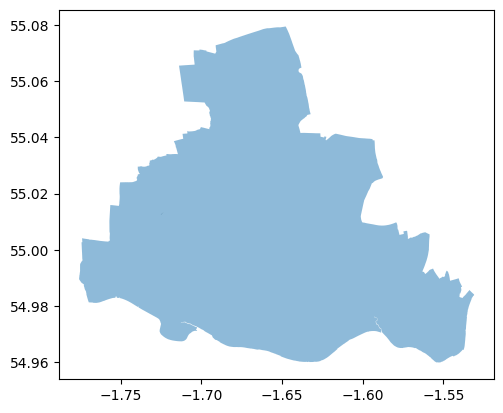

In [42]:
ax = gp_data[gp_data['name']=='A86013 - DENTON PARK MEDICAL GROUP'].plot(color='black')

LAD_data[LAD_data['LAD21NM']=='Newcastle upon Tyne'].plot(ax=ax, alpha=0.5)

gpd.overlay(LAD_data, gp_data[gp_data['name']=='A86013 - DENTON PARK MEDICAL GROUP'], how='intersection').plot(ax=ax, alpha=0.5)

<Axes: >

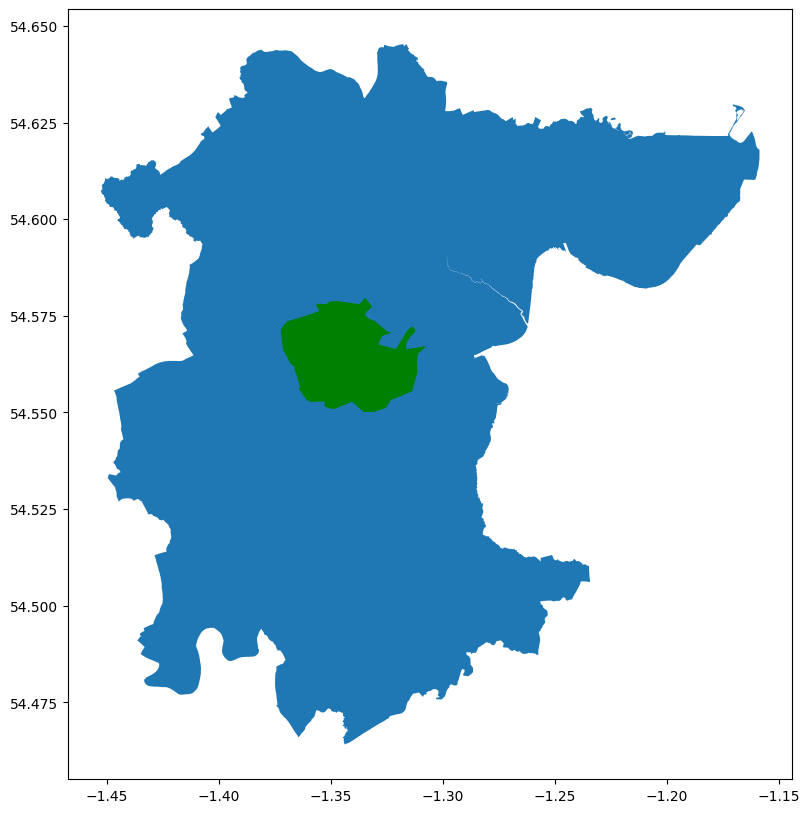

In [43]:
ax = LAD_data[LAD_data['LAD21NM']=='Stockton-on-Tees'].plot(figsize=(10,10))

gp_data[gp_data['name']=='A81001 - THE DENSHAM SURGERY'].plot(ax=ax, color='green')

<Axes: >

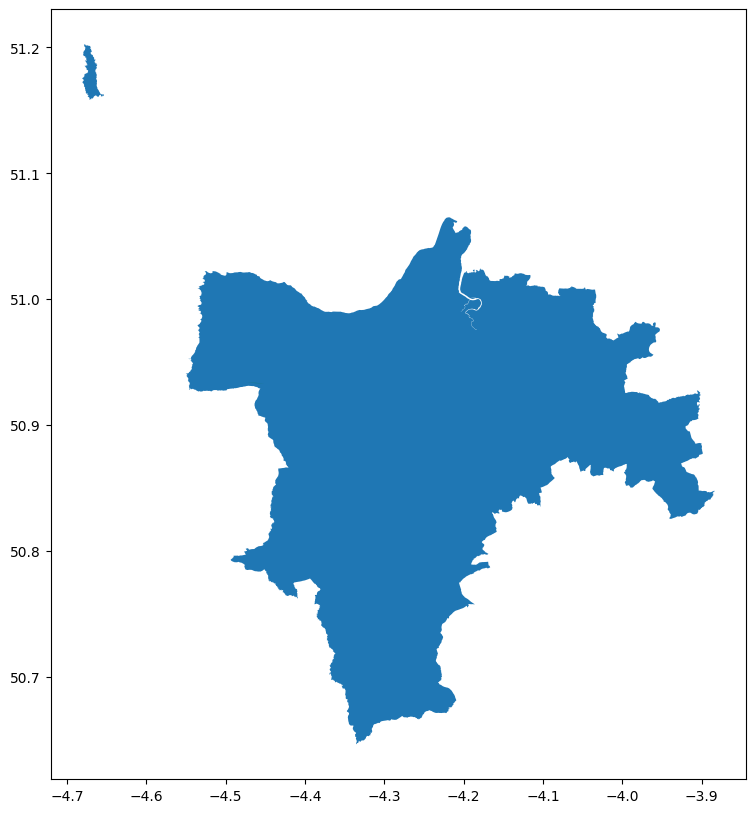

In [44]:
ax = LAD_data[LAD_data['LAD21NM']=='Torridge'].plot(figsize=(10,10))

gp_data[gp_data['name']=='L83129 - HARTLAND SURGERY'].plot(ax=ax, color='green')

<Axes: >

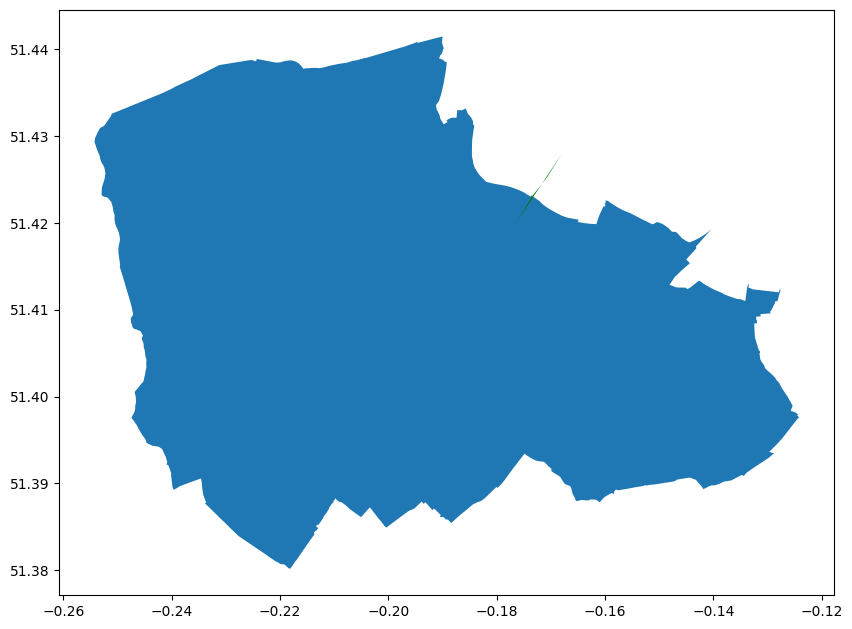

In [45]:
ax = LAD_data[LAD_data['LAD21NM']=='Merton'].plot(figsize=(10,10))

gp_data[gp_data['name']=='H85048 - BROCKLEBANK GROUP PRACTICE'].plot(ax=ax, color='green')

<Axes: >

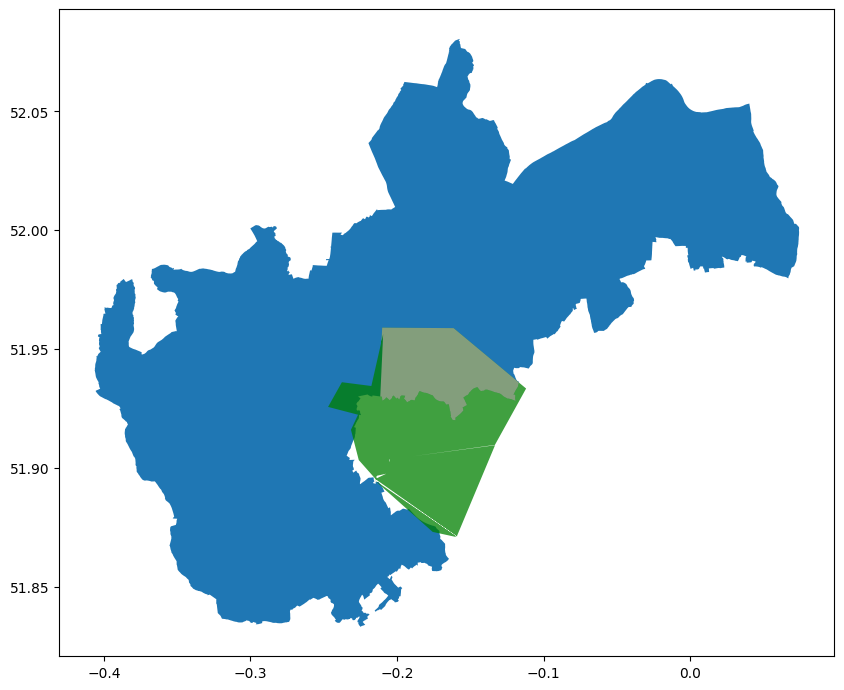

In [46]:
ax = LAD_data[LAD_data['LAD21NM']=='North Hertfordshire'].plot(figsize=(10,10))

gp_data[gp_data['name']=='E82086 - KING GEORGE & MANOR HOUSE SURGERIES'].plot(ax=ax, color='green', alpha=0.75)

gpd.overlay(LAD_data[LAD_data['LAD21NM']=='North Hertfordshire'], gp_data[gp_data['name']=='E82086 - KING GEORGE & MANOR HOUSE SURGERIES'], how='intersection').plot(ax=ax, color='pink', alpha=0.5)

<Axes: >

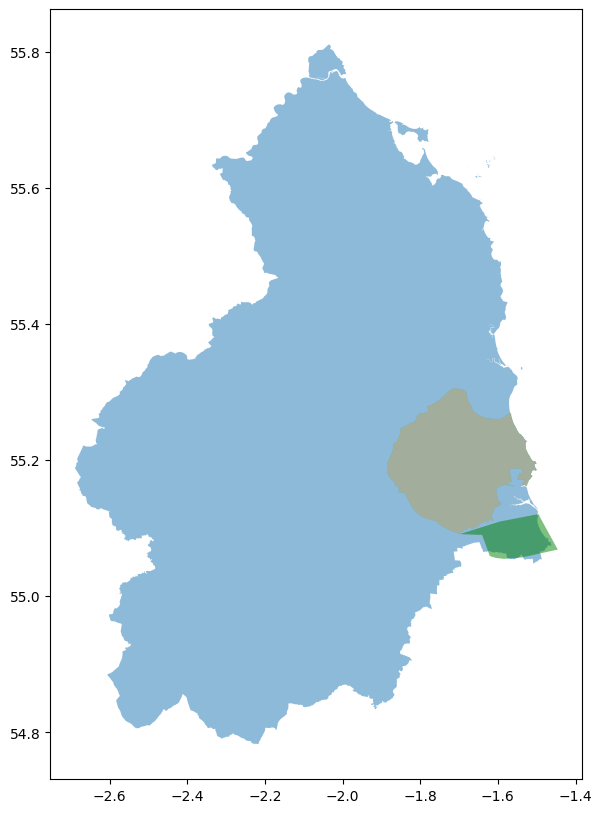

In [47]:
ax = LAD_data[LAD_data['LAD21NM']=='Northumberland'].plot(figsize=(10,10), alpha=0.5)

gp_data[gp_data['name']=='A84036 - VALENS MEDICAL PARTNERSHIP'].plot(ax=ax, color='green', alpha=0.5)

gpd.overlay(LAD_data, gp_data[gp_data['name']=='A84036 - VALENS MEDICAL PARTNERSHIP'], how='intersection').plot(ax=ax, color='pink', alpha=0.5)

<Axes: >

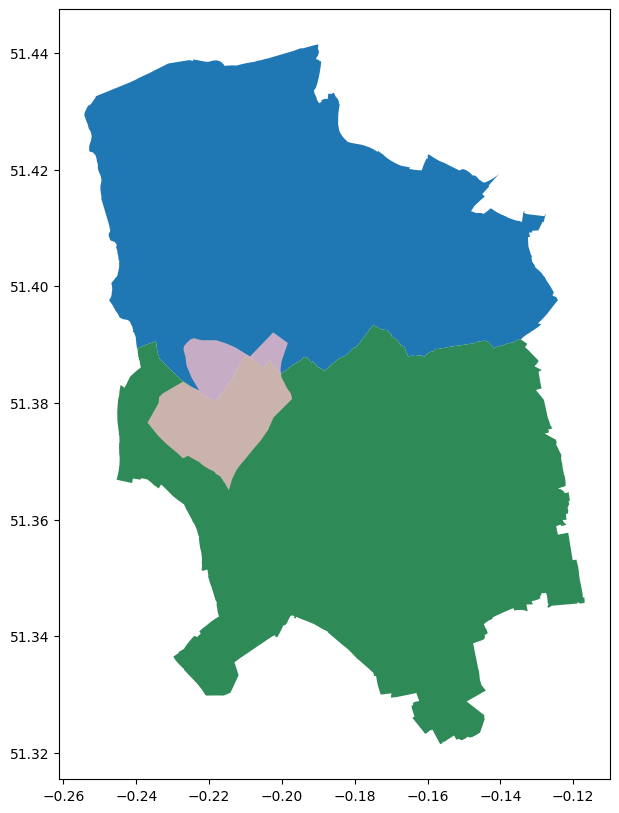

In [48]:
ax = LAD_data[LAD_data['LAD21NM']=='Merton'].plot(figsize=(10,10))

LAD_data[LAD_data['LAD21NM']=='Sutton'].plot(ax=ax, color='seagreen')

gp_data[gp_data['name']=="H85618 - JAMES O'RIORDAN MEDICAL CENTRE"].plot(ax=ax, color='pink', alpha=0.75)

#gpd.overlay(LAD_data[LAD_data['LAD21NM']=='Merton'], gp_data[gp_data['name']=="H85618 - JAMES O'RIORDAN MEDICAL CENTRE"], how='intersection').plot(ax=ax, color='violet', alpha=0.5)


In [49]:
gp_data[gp_data['name']=='A84036 - VALENS MEDICAL PARTNERSHIP'].area

/var/folders/4n/x6w1yfcx01qbymrsfpz4ybq00000gn/T/ipykernel_10754/3580294316.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gp_data[gp_data['name']=='A84036 - VALENS MEDICAL PARTNERSHIP'].area


0    0.040053
dtype: float64

In [50]:
gpd.overlay(LAD_data, gp_data[gp_data['name']=='A84036 - VALENS MEDICAL PARTNERSHIP'], how='intersection').area

/var/folders/4n/x6w1yfcx01qbymrsfpz4ybq00000gn/T/ipykernel_10754/607839508.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gpd.overlay(LAD_data, gp_data[gp_data['name']=='A84036 - VALENS MEDICAL PARTNERSHIP'], how='intersection').area


0    0.049385
dtype: float64

<Axes: >

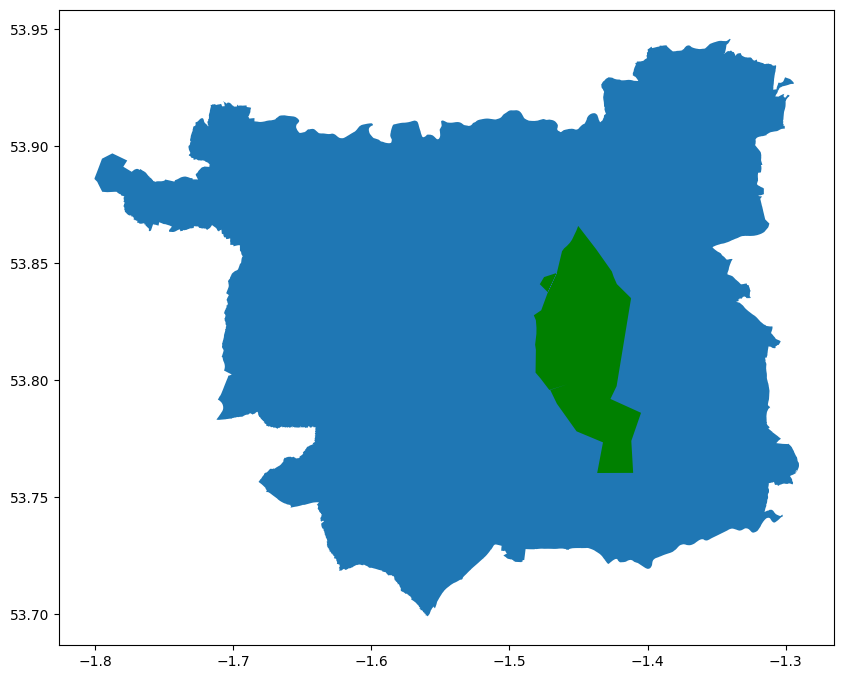

In [51]:
ax = LAD_data[LAD_data['LAD21NM']=='Leeds'].plot(figsize=(10,10))

gp_data[gp_data['name']=='B86075 - DR T P FOX and PARTNERS'].plot(ax=ax, color='green')

In [52]:
gp_data[gp_data["name"]=='A81001 - THE DENSHAM SURGERY'].area

/var/folders/4n/x6w1yfcx01qbymrsfpz4ybq00000gn/T/ipykernel_10754/3058622921.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gp_data[gp_data["name"]=='A81001 - THE DENSHAM SURGERY'].area


0    0.001233
dtype: float64

In [53]:
gpd.sjoin(LAD_data, gp_data[gp_data["name"]=='A81001 - THE DENSHAM SURGERY'], how='inner', predicate='intersects')

,OBJECTID,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,...,Region,SubICBCode,ICBCode,ODSCode,fill-opacity,stroke,OrgLongitude,OrgLatitude,DCORegion,CCGCode
3,4,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.55691,64624aef-6611-4e3c-bba8-870b0b889e1d,"MULTIPOLYGON (((-1.27211 54.55337, -1.27213 54...",...,Y63,16C,QHM,A81001,0.0,#FF901E,-1.3189990,54.5616378,NaN,NaN


In [54]:
gpd.overlay(LAD_data, gp_data[gp_data["name"]=='C81001 -'], how='intersection').geometry.area

/var/folders/4n/x6w1yfcx01qbymrsfpz4ybq00000gn/T/ipykernel_10754/1906643631.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gpd.overlay(LAD_data, gp_data[gp_data["name"]=='C81001 -'], how='intersection').geometry.area


0    0.004729
1    0.000006
2    0.000049
dtype: float64

In [55]:
gpd.overlay(LAD_data, gp_data[gp_data["name"]=='C81001 -'], how='intersection').area

/var/folders/4n/x6w1yfcx01qbymrsfpz4ybq00000gn/T/ipykernel_10754/2839070745.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gpd.overlay(LAD_data, gp_data[gp_data["name"]=='C81001 -'], how='intersection').area


0    0.004729
1    0.000006
2    0.000049
dtype: float64